## Tuto NETWORKX


- On importe la librairie networkx

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from numpy import arange
import numpy as np
import pandas as pd

- Création du graphe vide 

In [2]:
G = nx.Graph()
print(G)

Graph with 0 nodes and 0 edges


## Opérations sur les noeuds


- Ajout d'un noeud au graphe : 

In [3]:
G.add_node(3)
print(G)

Graph with 1 nodes and 0 edges


- Ajout d'un noeud avec un/des attribut(s). Dans l'exemple suivant on ajoute comme attribut "ans" (AS number) qui prend la valeur 15

In [4]:
G.add_node(4,asn=15)

- On peut accéder au attribut du noeud via la commande suivante : `G._node[<sommet>][<attribute_rechercher>]`
Dans l'exemple suivant on recupère l'attribut "ans" du sommet 4.

In [5]:
asn_4 = G._node[4]['asn']
print(asn_4)

15


## Opérations sur les arêtes

- Ajout d'une arêtes
Nous pouvons ici ajouter une arêtes entre les deux noeuds que nous avons créé précedemment. Ici aussi nous pouvons ajouter des attributs aux arêtes de la même façon que pour les noeuds

In [6]:
G.add_edge(3,4, poids = "je_suis_gros")

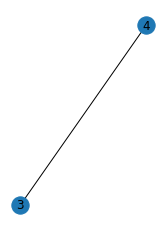

In [7]:
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True)
plt.show() 

Notons que nous pouvons ajouter une arête entre deux noeuds n'ayant pas été défini précédemment. Cela créera automatiquement les noeuds en questions.
- Exemple :

In [8]:
G.add_edge(9,7, poids ="10G")
G.add_edge(9,3, poids ="10G")

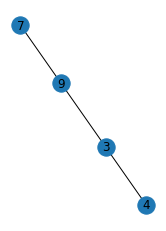

In [9]:
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True)
plt.show() 

- Nous pouvons également récuperer les attributs des arêtes

In [10]:
G.edges[9,7]["poids"]

'10G'

Nous pouvons aussi accéder au voisin d'un noeud de la façcon suivante : `G[<sommet>]`

In [11]:
voisin_de_3 = G[3]
#print(voisin_de_3)
print(list(G.neighbors(3)))

[4, 9]


Fonction permettant de connaitre le nombre de voisin d'un noeud 

In [12]:
def neighbours_number(Noeud,Graphe) :
    return len(G[Noeud])

print(neighbours_number(3,G))

2


## Données pertinentes du graphe

- Networkx a de nombreuses fonctions permettant de calculer des informations sur le graphe tel que le page rank des noeuds, leur centralité... <br> <br>

- Les deux fonctions suivantes prennent en argument un entier $n$ et un graphe $G$, et retournent respectivement les $n$ noeuds ayant le page rank le plus élevé et les $n$ noeuds ayant le degree centrality le plus élevé. 


In [13]:
def maxrank(n,G):
    dict_pagerank =nx.pagerank(G)
    list_pagerank=list(dict_pagerank.values())
    L=np.zeros(n)
    for i in range(n):
        L[i]=G._node[list_pagerank.index(max(list_pagerank))]['asn'] # Ajoute l'ASN ayant le page rank le plus élevé à L
        list_pagerank.remove(max(list_pagerank))
    return L


def maxcentrality(n,G):
    dict_centrality =nx.degree_centrality(G)
    list_centrality=list(dict_centrality.values())
    L=np.zeros(n)
    for i in range(n):
        L[i]=G._node[list_centrality.index(max(list_centrality))]['asn'] # Ajoute l'ASN ayant la centralité la plus élevé à L
        list_centrality.remove(max(list_centrality))
    return L

## Application à notre projet

Notre but est de créer le graphe à partir du fichier .txt.
Les noeuds auront comme attribut leur numéro d'AS et les arêtes auront comme attribut le type de lien qu'ils representent. Cf l'exemple suivant pour comprendre.


In [14]:
def dictiongraph(fichier_texte):
    fichier = open(fichier_texte,"r")
    dictio = []
    memoire=-1
    for ligne in fichier:
        tabligne = ligne.split("|")
        try:
            asn1 = int(tabligne[0])
            asn2 = int(tabligne[1])
            if asn1 != memoire:
                dictio.append(asn1)
                memoire = asn1
            dictio.append(asn2)
        except ValueError:
            pass
    l = arange(len(list(set(dictio))))
    dictiofinal =dict_from_list = dict(zip(sorted(list(set(dictio))), l))
    return dictiofinal

In [15]:
def creation_graph(fichier_texte):
    G = nx.Graph() 
    fichier = open(fichier_texte,"r")
    cpt = 0
    memoire = -1
    dictio = dictiongraph(fichier_texte)
    i=0
    #Ajout de tous les noeuds
    for num_as in dictio :
        G.add_node(i,asn=num_as)
        i+=1
    #Ajout des arêtes
    for ligne in fichier:
        tabligne = ligne.split("|")
        try:
            asn1 = int(tabligne[0])
            asn2 = int(tabligne[1])
            info = int(tabligne[2])
            if info == 0 :
                G.add_edge(dictio[asn1],dictio[asn2],type= str(asn1) + '|p2p|' +str(asn2))
            elif info == -1 :

                G.add_edge(dictio[asn1],dictio[asn2],type=str(asn1) + '|p2c|' +str(asn2))
        except ValueError:
            pass
    return G

### Travail sur un petit graphe : ne garder que la plus grande composante connexe d'un graphe

cf : https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html

In [16]:
def dictiongraph(fichier_texte):
    fichier = open(fichier_texte,"r")
    dictio = []
    memoire=-1
    for ligne in fichier:
        tabligne = ligne.split("|")
        try:
            asn1 = int(tabligne[0])
            asn2 = int(tabligne[1])
            if asn1 != memoire:
                dictio.append(asn1)
                memoire = asn1
            dictio.append(asn2)
        except ValueError:
            pass
    l = arange(len(list(set(dictio))))
    dictiofinal =dict_from_list = dict(zip(sorted(list(set(dictio))), l))
    return dictiofinal

In [17]:
def creation_graph(fichier_texte):
    G = nx.Graph() 
    fichier = open(fichier_texte,"r")
    cpt = 0
    memoire = -1
    dictio = dictiongraph(fichier_texte)
    i=0
    #Ajout de tous les noeuds
    for num_as in dictio :
        G.add_node(i,asn=num_as)
        i+=1
    #Ajout des arêtes
    for ligne in fichier:
        tabligne = ligne.split("|")
        try:
            asn1 = int(tabligne[0])
            asn2 = int(tabligne[1])
            info = int(tabligne[2])
            if info == 0 :
                G.add_edge(dictio[asn1],dictio[asn2],type= str(asn1) + '|p2p|' +str(asn2))
            elif info == -1 :

                G.add_edge(dictio[asn1],dictio[asn2],type=str(asn1) + '|p2c|' +str(asn2))
        except ValueError:
            pass
    return G

In [18]:
#G = creation_graph('data/20151201.as-rel2_small.txt')
G = creation_graph('../IMPLANTATION/CAIDA/data/CAIDA_AS_RELATIONSHIP/20210301.as-rel2.txt')

G.number_of_nodes()

71434

[100.0]


<AxesSubplot:>

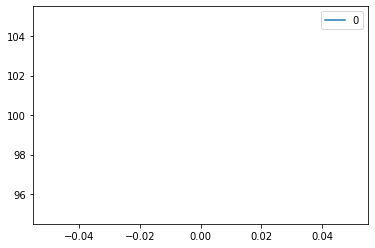

In [19]:
list_connec_comp = sorted(nx.connected_components(G), key=len, reverse=True)
for i in range(len(list_connec_comp)):
    list_connec_comp[i] = 100*(len(list_connec_comp[i])/G.number_of_nodes())


print(list_connec_comp)
df_connect_comp = pd.DataFrame([sum(list_connec_comp[0:i+1]) for i in range(len(list_connec_comp))])

df_connect_comp.plot()